### Importing Libraries

In [2]:
import os
import string
import csv
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [3]:
import nltk
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/varunchopra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/varunchopra/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/varunchopra/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

<h3>Reading the input from lyrics file.</h3>

In [8]:
stop_words = (stopwords.words('english'))
newsw=['youve','youd','youll','shes','ive','hes','cant','never','dont','one','didnt']
stop_words.extend(newsw)

header = ['word', 'frequency', 'genre']

with open(f'Documents/genres2/freqDict.csv', 'w', newline = "") as file:
    writer = csv.writer(file)
    writer.writerow(header)

# a list of all the present genres
genresList = ['blues_lyrics', 'country_lyrics', 'disco_lyrics', 'hiphop_lyrics', 'metal_lyrics', 'pop_lyrics', 'reggae_lyrics', 'rock_lyrics']

# iterating over the list of all the genres in the genreList
for genreName in genresList:
    
    genreLyrics = ''
    lyricStopped = list()
    
    # getting the path of the current genre
    genre = os.listdir(f'Documents/genres2/{genreName}')
    
    # selecting each song from each genre
    for song in genre:
        path = f'Documents/genres2/{genreName}/{song}'
        
        if song == '.DS_Store':
            continue
        
        # defining the path of a song lyrics file
        songname = open(path, 'r')
        
        # read all the words in lower case
        lyric = songname.read().lower()
        
        # removing punctuations
        for punct in string.punctuation:
            lyric = lyric.replace(punct, '')
        
        # adding lyrics to genreLyrics list
        genreLyrics += lyric
    
    # extracting words from a particular genreLyrics
    words = genreLyrics.split()
    
    # removing numbers
    words = [x for x in words if not (x.isdigit() or x[0] == '-' and x[1:].isdigit())]
    
    # lemmatized words
    lmtzr = WordNetLemmatizer()
    words = [lmtzr.lemmatize(x) for x in words]
    
    # removing the stopwords
    for l in words:
        if l not in stop_words:
            lyricStopped.append(l)
            
    # stemming
    porter = PorterStemmer()
    lyricStopped = [porter.stem(word) for word in lyricStopped]
    
    # frequency dictionary
    freqDict = {}
    
    # counting the occurence of all the words in the dictionary
    # no need to make a set of UNIQUE WORDS as the "keys" of this dictionary will all be unique
    for word in lyricStopped:
        freqDict[word] = freqDict.get(word, 0) + 1
    # print the dictionary
    with open(f'Documents/genres2/freqDict.csv', 'a', newline = "") as file:
        writer = csv.writer(file)
        for key, value in freqDict.items():
            writer.writerow([key, value, genreName.replace('_lyrics','')])


In [6]:
dataset = pd.read_csv('Documents/genres2/freqDict.csv')
X = dataset.iloc[:, [0,1]].values
y = dataset.iloc[:, 2].values

print(X)

[['true' 5]
 ['love' 65]
 ['goneha' 2]
 ...
 ['devil' 1]
 ['asid' 1]
 ['spit' 1]]


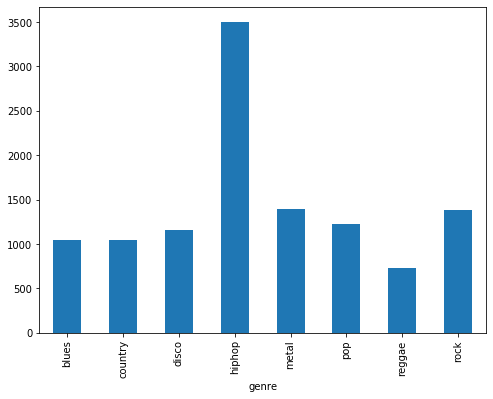

In [9]:
fig = plt.figure(figsize=(8,6))
dataset.groupby('genre').frequency.count().plot.bar(ylim=0)
plt.show()

In [10]:
word=X[:,0]
frequency=X[:,1]
frequency= np.reshape(frequency,(-1,1))
frequency.shape

(11470, 1)

In [11]:
le = preprocessing.LabelEncoder()
word_encoded=le.fit_transform(word)
word_encoded = np.reshape(word_encoded,(-1,1))
word_encoded.shape

(11470, 1)

In [12]:
features = np.column_stack((word_encoded,frequency))
features.shape

(11470, 2)

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.2, random_state = 42)

In [66]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [67]:
y_pred = classifier.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0   0   0 203   0   4   0   0]
 [  0   0   0 214   0   5   0   0]
 [  0   0   0 243   0   7   0   0]
 [  0   0   0 701   0  12   0   0]
 [  0   0   0 270   0   0   0   0]
 [  0   0   0 236   0  13   0   0]
 [  0   0   0 133   0   3   0   0]
 [  0   0   0 243   0   7   0   0]]


In [69]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3112467306015693
